### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

>自变量是文字条件是否一致，即显示的文字是否与它们的打印颜色匹配。因变量是说出同等大小的列表中的墨色名称的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

>原假设是一致文字条件和不一致文字条件下使用的时间相同，备择假设是一致文字条件和不一致文字条件下使用的时间不同。

$$H_0: \mu_{diff} = 0$$

$$H_1: \mu_{diff} \neq 0$$

>$\mu_{diff}$ 表示总体参与者在一致和不一致文字条件下使用时间差值的均值。

>本试验执行配对样本T检验，对样本做α=0.05的双尾检验。

>这里假设总体服从正态分布，并在试验过程中观察样本是否趋近正态分布；如果是，则根据中心极限定理，当总体容量足够大时，可以认为总体服从正态分布。

>因为样本容量n<30，且总体的均值和方差未知，所以使用T检验。因为本试验的两组数据相关，是同一组个体在不同条件下的测量值；而每对数据相互独立，即每一对数据是由不同的个体测量得出。因此采用配对样本T检验。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('stroopdata.csv')
df.head(1)

,Congruent,Incongruent
0,12.079,19.278


In [3]:
df['diff'] = df['Congruent'] - df['Incongruent']
df.head(1)

,Congruent,Incongruent,diff
0,12.079,19.278,-7.199


In [4]:
df.describe()

,Congruent,Incongruent,diff
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


>从描述性统计可以看出Congruent组时间的均值和方差都小于Incongruent组；两组数据的方差均小于diff的方差。

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

In [5]:
con_mean = df['Congruent'].mean()
inc_mean = df['Incongruent'].mean()
diff_mean = df['diff'].mean()

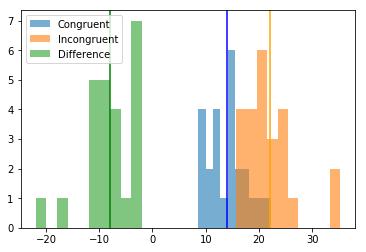

In [6]:
plt.hist(df['Congruent'], alpha=0.6, label='Congruent')
plt.hist(df['Incongruent'], alpha=0.6, label='Incongruent')
plt.hist(df['diff'], alpha=0.6, label='Difference')
plt.axvline(con_mean, color='blue')
plt.axvline(inc_mean, color='orange')
plt.axvline(diff_mean, color='green')
plt.legend();

>从直方图中可以看出，Congruent组分布在Incongruent组左侧，且Incongruent组的分布比Congruent组分散；差值组的数据均在0左侧。从可视化图中可以更直观地验证Congruent组时间的均值和方差都小于Incongruent组。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [7]:
diff_std = df['diff'].std()
size = df['diff'].size
size - 1

23

>在本试验中置信水平取95%。查t检验表可知，在5%的显著性水平下，自由度为23，双尾检验的critical value为±2.069。

In [8]:
critical_value = 2.069
diff_mean - critical_value * (diff_std / (size**0.5)), diff_mean + critical_value * (diff_std / (size**0.5))

(-10.019367912023053, -5.91021542131028)

In [9]:
p_value = (diff_mean - 0)/(diff_std / (size**0.5))
p_value

-8.020706944109957

>置信区间是(-10.019367912023053, -5.91021542131028)，不包括0。P值为-8.020706944109957，小于-2.069，落在critical region内。试验结果拒绝原假设，认为在一致文字条件和不一致文字条件下使用的时间显著不同。结果与试验一开始通过描述性统计和可视化观察到的现象一致。

>导致所观察到的效应的原因是人们在判断文字的色彩时会受文字本身含义的影响。类似的效应比如判断字符数量，可能判断“555”的字符数量比“333”所需的时间长。